In [ ]:
# --- Step 1: Install system-level dependencies ---
!apt-get install -y openslide-tools

# --- Step 2: Install Python packages from your repo's requirements.txt ---
!pip install -r https://raw.githubusercontent.com/sudeonder/wsi-retrieval/main/requirements.txt

# --- Step 3: Normalize working directory ---
import os
import sys

# If notebook is opened from /content/wsi-retrieval/notebooks/, move to project root
if os.path.basename(os.getcwd()) == "notebooks":
    %cd ..

# If you somehow started outside the repo, clone and move in
elif not os.path.exists("/content/wsi-retrieval/wsi"):
    %cd /content
    !git clone https://github.com/sudeonder/wsi-retrieval.git
    %cd wsi-retrieval

# --- Step 4: Add project root to Python path for imports ---
sys.path.append('/content/wsi-retrieval')



In [16]:
# Authenticate to access Google Cloud resources
from google.colab import auth
auth.authenticate_user()

# Install OpenSlide and dependencies
!apt-get install -y openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-5build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [22]:
# Remove the old (slow) Python-only version
!pip uninstall -y crcmod

# Install required build tools and compile crcmod from source
!apt-get install -y python3-dev
!pip install --no-binary :all: crcmod

bucket_path = "gs://bracs-dataset-bucket/BRACS/BRACS_WSI/test/Group_AT/Type_ADH/BRACS_1892.svs"
local_path = "/content/BRACS_1892.svs"

!gsutil -m cp gs://bracs-dataset-bucket/BRACS/BRACS_WSI/test/Group_AT/Type_ADH/BRACS_1892.svs /content/BRACS_1892.svs


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for crcmod: filename=crcmod-1.7-cp311-cp311-linux_x86_64.whl size=31658 sha256=83f54dc8c3caa4fd839d195629c4a0e0aa2687a029ef7f4e729c70b9974849eb
  Stored in directory: /root/.cache/pip/wheels/23/94/7a/8cb7d14597e6395ce969933f01aed9ea8fa5f5b4d4c8a61e99
Successfully built crcmod
Copying gs://bracs-dataset-bucket/BRACS/BRACS_WSI/test/Group_AT/Type_ADH/BRACS_1892.svs...
/ [1/1 files][  2.2 GiB/  2.2 GiB] 100% Done  63.1 MiB/s ETA 00:00:00           
Operation completed over 1 objects/2.2 GiB.                                      


Slide dimensions: (105576, 88656)
Number of levels: 4
Level dimensions: ((105576, 88656), (26394, 22164), (6598, 5541), (3299, 2770))
Downsamples: (1.0, 4.0, 16.000606244316458, 32.004100575275515)
40
0.25190000000000001
0.25190000000000001


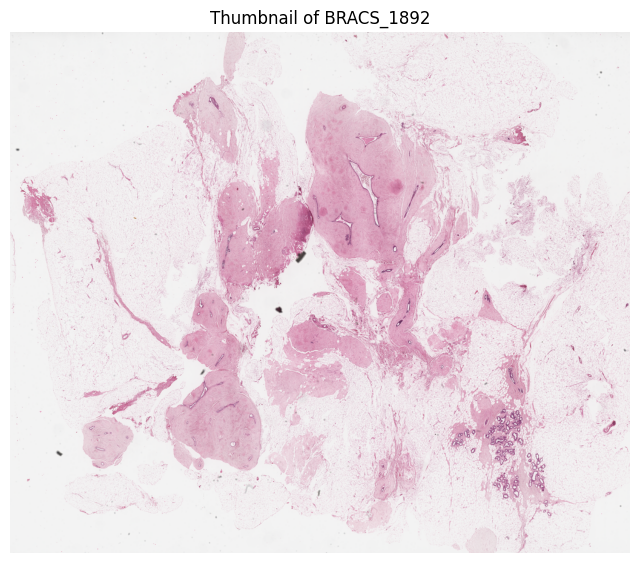

In [24]:
import openslide
import matplotlib.pyplot as plt

# Open the slide
slide = openslide.OpenSlide(local_path)

# Print slide metadata
print("Slide dimensions:", slide.dimensions)
print("Number of levels:", slide.level_count)
print("Level dimensions:", slide.level_dimensions)
print("Downsamples:", slide.level_downsamples)

print(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])        # e.g., "40"
print(slide.properties[openslide.PROPERTY_NAME_MPP_X])                  # e.g., "0.25"
print(slide.properties[openslide.PROPERTY_NAME_MPP_Y])                # e.g., "0.25"

# Show thumbnail (low-res overview)
thumbnail = slide.get_thumbnail((1024, 1024))

plt.figure(figsize=(8, 8))
plt.imshow(thumbnail)
plt.title("Thumbnail of BRACS_1892")
plt.axis('off')
plt.show()

